# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP tools
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud, STOPWORDS

# load dataset


In [4]:
df = pd.read_csv("../data/raw_analyst_ratings.csv")

df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


# Basic info & cleaning

In [14]:
#basic info, datatypes, missing values
df.info()
df.shape
df.isna().sum()
if "Unnamed: 0" in df.columns:
    df.drop(columns=["Unnamed: 0"], inplace=True)
# If 'headline' column exists, drop rows with missing headlines because we need text:
if 'headline' in df.columns:
    df = df.dropna(subset=['headline']).reset_index(drop=True)
#convert date to datetime
df["date"] = pd.to_datetime(df["date"], format="mixed", utc=True)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype                    
---  ------     --------------    -----                    
 0   headline   1407328 non-null  object                   
 1   url        1407328 non-null  object                   
 2   publisher  1407328 non-null  object                   
 3   date       55987 non-null    datetime64[ns, UTC-04:00]
 4   stock      1407328 non-null  object                   
dtypes: datetime64[ns, UTC-04:00](1), object(4)
memory usage: 53.7+ MB


# Compute headline length statistics

In [16]:
df['headline_length'] = df['headline'].apply(len)
df['word_count'] = df['headline'].apply(lambda x: len(x.split()))

df[['headline_length', 'word_count']].describe()


,headline_length,word_count
count,1.407328e+06,1.407328e+06
mean,7.312051e+01,1.141671e+01
std,4.073531e+01,6.352997e+00
min,3.000000e+00,1.000000e+00
25%,4.700000e+01,7.000000e+00
50%,6.400000e+01,1.000000e+01
75%,8.700000e+01,1.300000e+01
max,5.120000e+02,7.700000e+01


# Plot headline length distribution

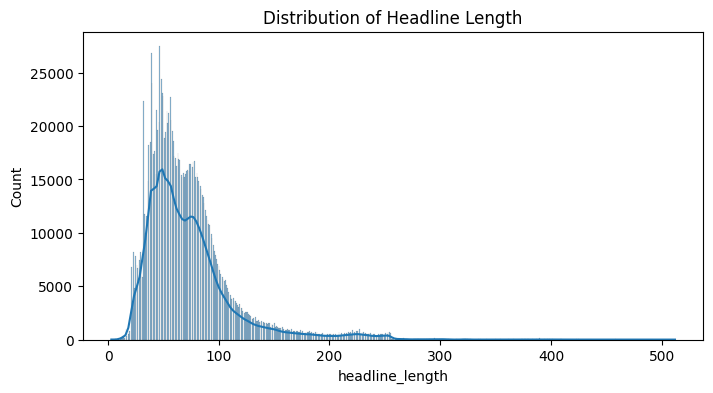

In [17]:
plt.figure(figsize=(8,4))
sns.histplot(df['headline_length'], kde=True)
plt.title("Distribution of Headline Length")
plt.show()


# Generate WordCloud (Keyword Extraction)

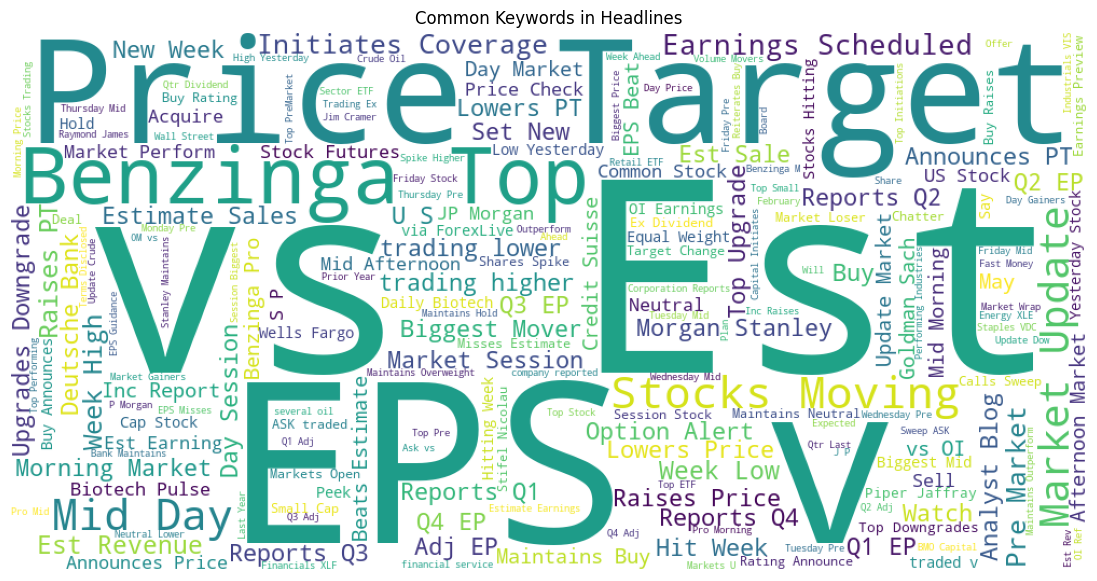

In [18]:
#Generate WordCloud (Keyword Extraction)
text = " ".join(df['headline'])

wc = WordCloud(width=1000, height=500,
               background_color='white',
               stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(14,7))
plt.imshow(wc)
plt.axis('off')
plt.title("Common Keywords in Headlines")
plt.show()


# Topic Modeling using LDA

In [20]:
# SAMPLE 10,000 headlines for LDA (fast!)
df_sample = df.sample(10000, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 1. Vectorize
vectorizer = CountVectorizer(stop_words='english', max_features=2000)
X = vectorizer.fit_transform(df_sample['headline'])

# 2. Train LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# 3. Show topics
words = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print(f"\nTOPIC {topic_idx + 1}:")
    top_words = [words[i] for i in topic.argsort()[-15:]]
    print(top_words)



TOPIC 1:
['stock', 'analyst', 'highs', 'industry', 'set', 'hit', 'biggest', 'movers', 'watch', 'yesterday', 'friday', 'new', '52', 'week', 'stocks']

TOPIC 2:
['beat', 'beats', 'adj', 'revenue', 'sees', 'q1', 'q4', 'q3', 'q2', 'estimate', 'sales', 'reports', 'eps', 'est', 'vs']

TOPIC 3:
['downgrades', 'higher', 'mid', 'pre', 'scheduled', 'companies', 'day', 'shares', 'moving', 'trading', 'session', 'market', 'stocks', 'earnings', 'benzinga']

TOPIC 4:
['lowers', 'hold', 'energy', 'update', 'share', 'target', '00', 'price', 'bank', 'maintains', 'says', 'raises', 'announces', 'pt', 'buy']

TOPIC 5:
['higher', 'pt', 'capital', 'markets', 'outperform', 'coverage', 'morning', 'initiates', 'morgan', 'target', 'price', 'mid', 'shares', 'update', 'market']
